# MD2DS - Master in Data Science and Statistical Learning

**Numerical Calculus and Linear Algebra**

Lecture 03: least square approximation

Deadline: 31/03/2022

In [47]:
# Install packages
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

# Exercise 1

Let $\mathbf{x} = \left(-1,-0.2,-0.2,-0.5,-0.1,0,0,0,0.5,1\right)^T$, $\mathbf{y}=\left(1.2, 4.2, 4.9, 2.8, 3.5, 3.7, 4.2, 4.1, 4.2, 6\right)^T$.
1.  Implement the least square polynomial approximation of degree $1$ via QR decomposition with respect to vertical and horizontal residuals. Print the related RMS errors.
2.  In the same figure, plot
  - the data points,
  - both the degree-1 polynomial approximations,
  - at each data point the vertical (horizontal) residual related to the first (second) polynomial (use dashed lines and different colors).
3.  Comment the results.

Solution 1.1

Funzioni richieste

In [48]:
# Metodo di Horner per il calcolo del polinomio
def horner(c, x):
    # n = polynomial order
    n = len(c)
    value = np.zeros(len(x))
    value[:] = c[n - 1]
    for i in range(n - 2, -1, -1):
        value = value*x + c[i]
    return value

In [49]:
# Stima dei coefficienti del polinomio tramite decomposizione QR della matrice di Vandermonde
def polyfitQR(x,y,n):
    A = np.vander(x, n+1, increasing=True)
    #print("cond.num. " + str(np.linalg.cond(A)))
    Q, R = np.linalg.qr(A, mode='complete')
    g = Q.transpose() @ y
    c = np.linalg.solve(R[0:n+1,:], g[0:n+1])
    res = g[n+1:]
    return (c, res)

Main

In [50]:
# 1. Implement the least square polynomial approximation of degree via QR
# decomposition with respect to vertical and horizontal residuals.
# Print the related RMS errors.

x = np.array([-1,  -0.2, -0.2, -0.5, -0.1, 0,   0,   0,   0.5, 1])
y = np.array([ 1.2, 4.2,  4.9,  2.8,  3.5, 3.7, 4.2, 4.1, 4.2, 6])

N = len(x)

cyx, ryx = polyfitQR(x,y,1)

p_y = horner(cyx, x)
rmsyx = math.sqrt(np.dot(ryx, ryx)/N)
print("RMS p_y(x): " + str(rmsyx))

cxy, rxy = polyfitQR(y,x,1)
p_x = horner(cxy, y)
rmsxy = math.sqrt(np.dot(rxy, rxy)/N)
print("RMS p_x(y): " + str(rmsxy))


RMS p_y(x): 0.5990291040061364
RMS p_x(y): 0.2526790416975803


Solution 1.2

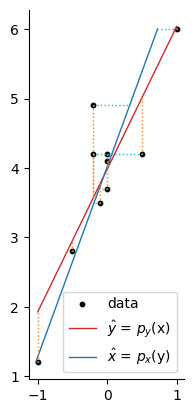

In [51]:
# 2. In the same figure, plot
# ◦ the data points,
# ◦ both the degree-1 polynomial approximations,
# ◦ at each data point the vertical (horizontal) residual related to
# the 1st (second) polynomial (use dashed lines and different colors).

fig = plt.figure()
plt.scatter(x, y, marker='o', color='k', s=10, label='data')
xtab = np.array([x.min(), x.max()])

# in questo caso l'algoritmo di Horner (ossia p_ytab = horner(cyx, xtab))
# è inutilmente macchinoso...
p_ytab = cyx[1]*xtab+cyx[0]
ytab = np.array([y.min(), y.max()])
#p_xtab = horner(cxy, ytab)
p_xtab = cxy[1]*ytab+cxy[0]


plt.plot(xtab, p_ytab, '-',color='tab:red', linewidth=1,
         label="{} = {}(x)".format(r"$\hat{y}$", r"$p_y$"))
plt.plot(p_xtab, ytab, '-',color='tab:blue', linewidth=1,
         label="{} = {}(y)".format(r"$\hat{x}$", r"$p_x$"))
for n in range(0,N):
    plt.plot([x[n], x[n]],[y[n],p_y[n]], ':',color='tab:orange', linewidth=1)
    plt.plot([x[n],p_x[n]], [y[n],y[n]], ':',color='tab:cyan',   linewidth=1)
plt.legend()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_aspect('equal')

plt.show()

Solution 1.3

I risultati mostrano uno scarto quadratico medio minore quando viene eseguita la regressione $x=p_x(y)$ rispetto a $y=p_y(x)$; il motivo di tale fatto è dovuto al range dei punti:
* le $x$ variano tra -1 e 1
* le $y$ tra 1.2 e 6

Infatti invertendo la regressione ai minimi quadrati $y = m_x\, x + q_x$, calcolata sugli scarti verticali (dove RMS $\approx$ 0.60), in
\begin{equation}
x = \underbrace{\frac{1}{m_x}}_{m_y}\, y + \underbrace{\frac{-q_x}{m_x}}_{q_y}
\end{equation}
e calcolando i residui di $x_i = m_y y_i + q_y$ abbiamo degli scarti  paragonabili (RMS $\approx$ 0.29) ai residui orizzontali ottenuti dalla regressione ai minimi quadrati sulle coppie $(y_i, x_i)$, dove avevamo RMS $\approx$ 0.25.

In [52]:
mx = cyx[1]
qx = cyx[0]

my = 1/mx
qy = -qx/mx

xyinv = my*y+qy
deltaxinv = x-xyinv;
errxyinv = math.sqrt(np.dot(deltaxinv,deltaxinv)/N)
print('RMS(x=my*y+qy): ' + str(errxyinv))

RMS(x=my*y+qy): 0.291557808686098


# Exercise 2

Let $P(x) = x^3 + x^2 -x +2$ be a polynomial of degree $3$ and $\mathbf{x} = (0, .25, .25, .5, .5, .5, .75, .75, 1, 1, 1)^T\in\mathbb{R}^{11}$. For $i=0,\dots, 10$, define $y_i = P(x_i)(1+e_i)$,
where $e_i\in[-5\cdot10^{-2}, 5\cdot10^{-2}]$ is a (pseudo)random number.
1.  For $n=1,3,5$ implement the least square polynomial approximation of degree $n$ via SVD decomposition (use the numpy command `np.linalg.svd(Matrix)`). For each $n$ print the approximation errors and RMS errors.
2.  Evaluate $P(x)$ and each polynomial approximation $P_n(x)$ on $201$ equally spaced abscissa $x_i\in[0,1]$ with the Horner algorithm and make a plot dislpaying
  - the data $(x_i, y_i)$ for $i=0,\dots,10$,
  - the groundtruth polynomial $P(x)$,
  - the least square approximaitons $P_n(x)$ for each $n$.
3. Comment the results and in particular say if it could be used also the QR decomposition.

Solution 2.1

Il codice implementa la stima del polinomio tramite SVD: riporta inoltre il costo ai minimi quadrati calcolato come norma al quadrato del vettore $\mathbf{g} = \mathtt{U}^\top\mathbf{y}$ prendendo le sue ultime componenti corrispondenti ai valori singolari nulli di $\mathtt{A}$; se $r$ è il numero di valori singolari non nulli, allora
\begin{equation}
\|\mathtt{A}\mathbf{x}-\mathbf{y}\|_2^2 = \sum_{i=r+1}^n g_i^2
\end{equation}

In [53]:
def polyfitSvdNaive(x, y, n):
    A = np.vander(x, n+1, increasing=True)

    U, d, V = np.linalg.svd(A)

    r = len(d) #restituisce solo i valori singolari non nulli
    g = U.T @ y

    z = g[:r]/d
    c = V.T @ z

    res2 = np.dot(g[r:],g[r:])

    return (c, res2)

Main

In [54]:
#P(x) = x^3 + x^2 − x + 2
#x = (0, .25, .25, .5, .5, .5, .75, .75, 1, 1, 1)
#yi = P(xi)(1 + ei) ei ∈ [−5 ⋅ 10^−2, 5 ⋅ 10^−2]

# # generazione dati ground thruth
x = np.array([0, 0.25, 0.25, 0.5, 0.5, 0.5, 0.75, 0.75, 1, 1, 1])
N = len(x)

coefs = [2, -1, 1, 1]
px = horner(coefs, x)

# pseudonumer in [a, b]
# np.random.seed(0) #per debug
a = -5.e-2
b = 5.e-2
N = len(x)
e = np.random.rand(N) * (b-a) + a
y = px * (1+e)

print('----------------------------------------------------')
print(' Naive SVD least square polynomial approximation ')
print('----------------------------------------------------')
print('degree err_p    RMS ')

pdegree = (1,3,5)
cn = []
for n in pdegree:
    #----------------------------------------------

    c, res2 = polyfitSvdNaive(x, y, n)
    #print(c)
    cn.append(c)

    p_pred = horner(c, x)
    error_p = np.linalg.norm(px-p_pred) # comparison with the exact data
    rms = math.sqrt(res2/N)
    print(f'n = {n}  {error_p:.2e} {rms:.2e} ')

----------------------------------------------------
 Naive SVD least square polynomial approximation 
----------------------------------------------------
degree err_p    RMS 
n = 1  8.41e-01 2.55e-01 
n = 3  1.57e-02 5.37e-02 
n = 5  1.69e-01 4.61e-02 


Solution 2.2



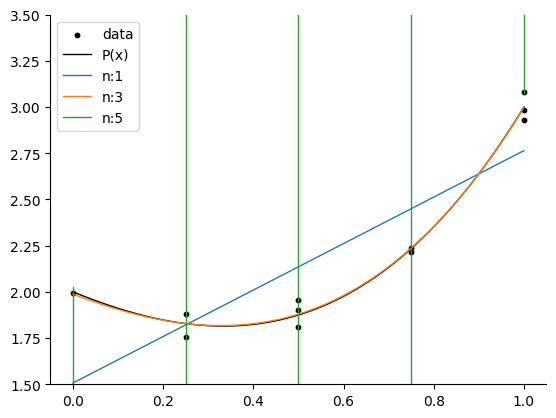

In [55]:
# 2. Evaluate P(x) and each polynomial approximation Pn(x) on equally spaced
# abscissa x_i in [0,1] with the Horner algorithm and make a plot dislpaying
# ◦ the data (xi,yi)
# ◦ the groundtruth polynomial P(x),
# ◦ the least square approximaitons Pn(x) for each n.


cols = ('tab:blue', 'tab:orange', 'tab:green', 'tab:red')
xtab = np.linspace(0,1,201)
ptab = horner(coefs, xtab)
fig = plt.figure()
plt.scatter(x, y, marker='o', color='k', s=10, label='data')
plt.plot(xtab, ptab, '-k', linewidth=1,
         label="P(x)")
for i,n in enumerate(pdegree):
    ptab = horner(cn[i], xtab)
    plt.plot(xtab, ptab, '-',color=cols[i], linewidth=1,
         label="n:" + str(n))
plt.legend()
plt.ylim(1.5, 3.5)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Solution 2.3

Il risultato ottenuto è poco attraente per $n=5$ a causa dei valori $x_i$: a parte $x=0$ (1 solo valore), i punti sono valutati in
* $x = 0.25$ (2 volte)
* $x = 0.5$ (3 volte)
* $x = 0.75$ (2 volte)
* $x=1$ (3 volte)

per cui la matrice di Vandermonde per $n=5$ ha rango 5, pur essendo una matrice $11 \times 6$. Tuttavia dall'implementazione superficiale in polyfitSvdNaive risulta che il numero di valori singolari diversi da 0 sono 6:
\begin{equation}
\mathbf{d} = \begin{bmatrix}5.04839212 & 1.95824331 & 4.77910703\cdot 10^{-1} & 9.71464505e\cdot 10^{-2} & 1.27723088\cdot 10^{-2} & 1.86370412\cdot 10^{-16}\end{bmatrix}^\top
\end{equation}

In particolare l'ultimo valore è molto piccolo, paragonabile alla precisione di macchina, ed una implementazione rigorosa dovrebbe tenerne conto considerandolo invece pari a 0.

Il codice che segue implementa un controllo sulla grandezza dei valori singolari, passando in ingresso un moltiplicatore $\lambda$ per la soglia
\begin{equation}
\tau = \lambda \|\mathtt{A}\|_\infty \epsilon_m \qquad (\epsilon_m = \texttt{sys.float_info.epsilon} \approx 2.22 \cdot 10^{-16})
\end{equation}
sotto la quale imporre i valori singolari a zero.

L'eliminazione di un valore singolare nel caso precedentemente analizzato produce comunque un polinomio di grado 5, caratterizzato dall'essere quello con il vettore dei coefficienti a norma minima.

Generando le $y_i$ con $\texttt{seed=0}$ abbiamo ad esempio:
\begin{equation}
\mathbf{c} \approx
\begin{bmatrix}
2.010 & -0.675 & -0.269 & 1.876 & 1.249 & -1.126
\end{bmatrix}^\top
\end{equation}
Senza la regolarizzazione di $\mathtt{A}$ sul suo rango, invece per i coefficienti ottenuti con $n=5$ sugli stessi dati si ha
\begin{equation}
\mathbf{c} \approx
\begin{bmatrix}
2.016 & -2.114 \cdot 10^{12} &  1.762 \cdot 10^{13} & -4.932 \cdot 10^{13} &
  5.637 \cdot 10^{13} & -2.255 \cdot 10^{13}
\end{bmatrix}^\top
\end{equation}

n = 1;  error_p: 8.58e-01;  rms: 3.01e-01 
n = 3;  error_p: 2.24e-01;  rms: 4.97e-02 
n = 5;  error_p: 2.71e-01;  rms: 1.85e-02 


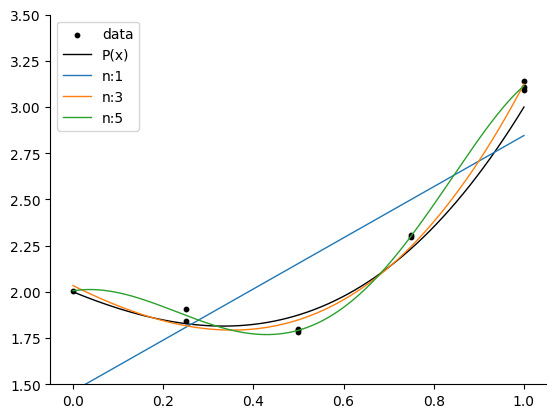

In [45]:
import sys

def polyfitSvdRanked(x, y, n, rankTolScale=0):

    A = np.vander(x, n+1, increasing=True)
    U, d, V = np.linalg.svd(A)
    r = len(d)
    g = U.T @ y
    z = g[:r]/d

    # eventuale correzione di rango
    tol = rankTolScale*np.linalg.norm(A,ord=np.inf)*sys.float_info.epsilon
    numrank = np.count_nonzero(d > tol)
    z[numrank:] = 0
    c = V.T @ z
    res = g[numrank:]

    return (c, np.dot(res,res))

ptab = horner(coefs, xtab) #ricalcolo ground truth

fig = plt.figure()
plt.scatter(x, y, marker='o', color='k', s=10, label='data')
plt.plot(xtab, ptab, '-k', linewidth=1,
         label="P(x)")
for i,n in enumerate(pdegree):

    c, res2 = polyfitSvdRanked(x, y, n, 2) #soglia a 2 epsilon di macchina (ma qui basta pure 1)
    #print(c)

    p_pred = horner(c, x)
    error_p = np.linalg.norm(px-p_pred) # comparison with the exact data
    rms = math.sqrt(res2/N)
    print(f'n = {n};  error_p: {error_p:.2e};  rms: {rms:.2e} ')# + str(math.sqrt(np.dot(y-p_pred, y-p_pred)/N)))

    ptab = horner(c, xtab)
    plt.plot(xtab, ptab, '-',color=cols[i], linewidth=1,
         label="n:" + str(n))

plt.legend()
plt.ylim(1.5, 3.5)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Le precedenti considerazioni sul numero di $x_i$ distinte ci portano inoltre a dire che è possibile impiegare la fattorizzazione QR fintanto che il rango della matrice A è pieno (QR richiede che la matrice A sia a rango pieno, ossia pari al numero delle sue colonne).

Quindi se A ha dimensione $m \times (n+1)$, occorrono $\mu$ ascisse distinte t.c. $n+1 \le \mu  \le m$; per cui:
* con $n=1,\, \Rightarrow \mu\ge 2$ (QR è applicabile nel nostro caso)
* con $n=3,\, \Rightarrow \mu\ge 4$  (QR è applicabile  nel nostro caso)
* con $n=5,\, \Rightarrow \mu\ge 6$ (QR non è applicabile nel nostro caso)

Per $n=5$ si osserva in effetti lo stesso fenomeno con svd senza controllo sul rango numerico.

n = 1  8.58e-01 3.01e-01 
n = 3  2.24e-01 4.97e-02 
n = 5  2.58e-01 1.23e-02 


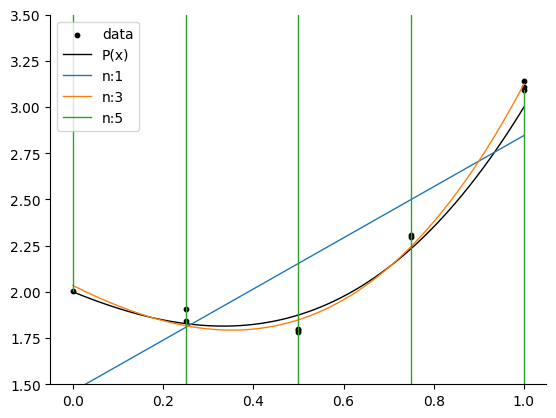

In [46]:
ptab = horner(coefs, xtab)

fig = plt.figure()
plt.scatter(x, y, marker='o', color='k', s=10, label='data')
plt.plot(xtab, ptab, '-k', linewidth=1,
         label="P(x)")

for i,n in enumerate(pdegree):

    c, res = polyfitQR(x, y, n) #uso QR

    p_pred = horner(c, x)
    error_p = np.linalg.norm(px-p_pred) # comparison with the exact data
    rms = math.sqrt(np.dot(res,res)/N)
    print(f'n = {n}  {error_p:.2e} {rms:.2e} ')

    ptab = horner(c, xtab)
    plt.plot(xtab, ptab, '-',color=cols[i], linewidth=1,
         label="n:" + str(n))

plt.legend()
plt.ylim(1.5, 3.5)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()